<h3 style="color:red;">Preterm neonate of 25+5 weeks of gestation and 0.826 kg with different sizes of the ductus arteriosus </h3>


 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.6 sec. Average model step in 0.0300 ms.
 Scaling normal neonate with reference weight of 3.545 kg to weight 0.826 kg.
 Ready in 7.9 sec. Average model step in 0.0330 ms.

 Model validation data for 'normal neonate', weight: 0.826 kg, gestational age: 40.0 wks

 Heartrate      : 146 bpm
 Art pressure   : 47/29 (35) mmHg
 Pulm pressure  : 30/13 (19) mmHg
 LVO            : 171.5 ml/kg/min
 LVEDV          : 2.1 ml/kg
 LVESV          : 0.9 ml/kg
 LVSV           : 1.2 ml/kg
 RVO            : 172.3 ml/kg/min
 RVEDV          : 2.9 ml/kg
 RVESV          : 1.5 ml/kg
 RVSV           : 1.2 ml/kg
 LVO/RVO        : 1.0
 DAo flow       : 95.4 ml/kg/min
 SVC flow       : 74.0 ml/kg/min
 PDA flow net   : 0.0 ml/kg/min, LtR: 0.0 ml/kg/min, RtL: 0.0 ml/kg/min
 FO flow net    : 0.7 ml/kg/min, LtR: 1.2 ml/kg/min, RtL: 0.5 ml/kg/min
 Resp rate      : 36 bpm
 SpO2 pre       : 97 %
 SpO2 post      : 96 %
 SpO2 ven       : 71 %
 pH          

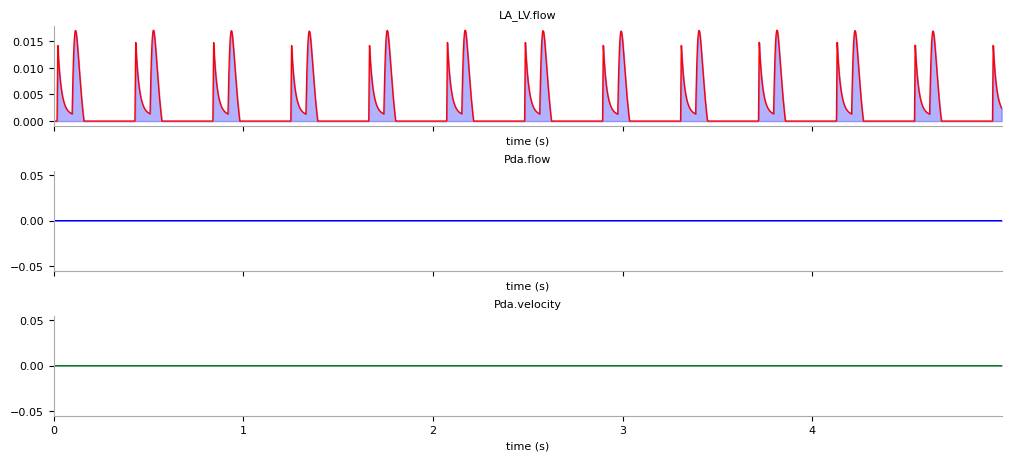

In [1]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'baseline_neonate' model definition
# model = ModelEngine("definitions/baseline_neonate.json")
model = ModelEngine("definitions/baseline_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

# stabilize the model by calculating 60 seconds
neo.calculate(60)

# scale the model to a 25 week old baby
neo.scale_patient_by_gestational_age("25wks_no_pda")

# stabilize the model by calculating 60 seconds
neo.calculate(120)

# get the vaildation data from the model
result = neo.validate_baseline()

print(" Note the reversed E/A ratio in the extreme premature born baby.")

# plot the flow across the mitral valve and pda flow velocity
data = neo.plot_time_graph(
    ["LA_LV.flow", "Pda.flow", "Pda.velocity"],
    combined=False,
    sharey=False,
    time_to_calculate=5.0,
    analyze=False,
    sampleinterval=0.0005,
    fig_size_x=10,
    fig_size_y=2,
)

<h5>Open the ductus arteriosus in 10 seconds to a diameter of 3.0 mm creating a left-to-right shunt.</h5>

 Ready in 0.6 sec. Average model step in 0.2814 ms.

Opening the ductus arteriosus by increasing the diameter to 3.0 mm in 10 seconds


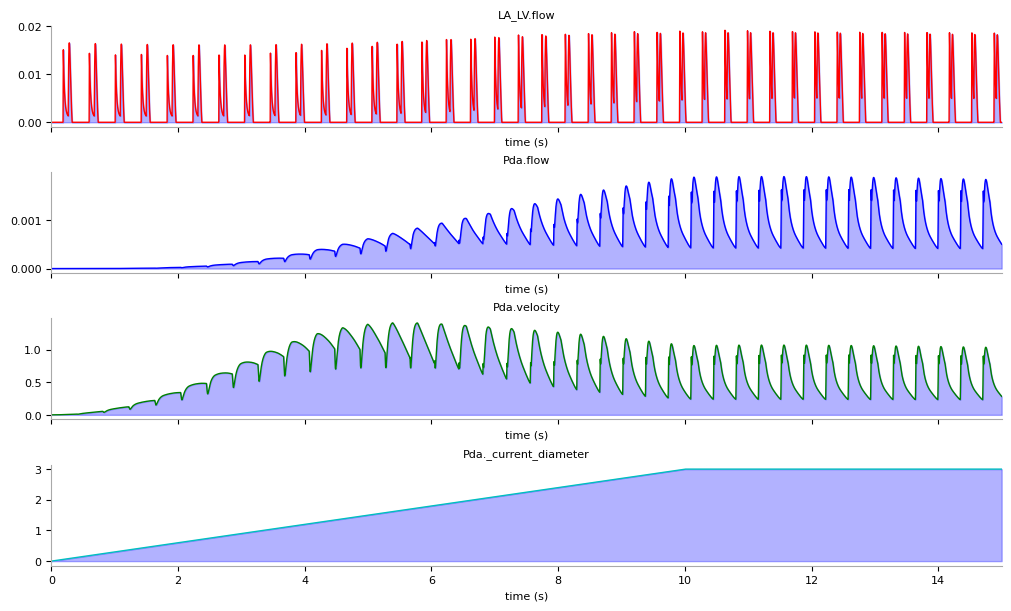

 Ready in 3.7 sec. Average model step in 0.0310 ms.

 Model validation data for 'normal neonate', weight: 0.826 kg, gestational age: 40.0 wks

 Heartrate      : 156 bpm
 Art pressure   : 46/25 (32) mmHg
 Pulm pressure  : 40/23 (29) mmHg
 LVO            : 249.3 ml/kg/min
 LVEDV          : 2.5 ml/kg
 LVESV          : 0.8 ml/kg
 LVSV           : 1.6 ml/kg
 RVO            : 159.1 ml/kg/min
 RVEDV          : 2.9 ml/kg
 RVESV          : 1.6 ml/kg
 RVSV           : 1.0 ml/kg
 LVO/RVO        : 1.57
 DAo flow       : 85.3 ml/kg/min
 SVC flow       : 67.7 ml/kg/min
 PDA flow net   : 95.0 ml/kg/min, LtR: 95.0 ml/kg/min, RtL: -0.0 ml/kg/min
 FO flow net    : 5.1 ml/kg/min, LtR: 5.1 ml/kg/min, RtL: -0.0 ml/kg/min
 Resp rate      : 36 bpm
 SpO2 pre       : 97 %
 SpO2 post      : 97 %
 SpO2 ven       : 67 %
 pH             : 7.41
 pCO2           : 5.6 kPa
 pO2            : 11.3 kPa
 HCO3           : 25.9 mmol/l
 BE             : 0.8 mmol/l

 Ready in 0.1 sec. Average model step in 0.0624 ms.


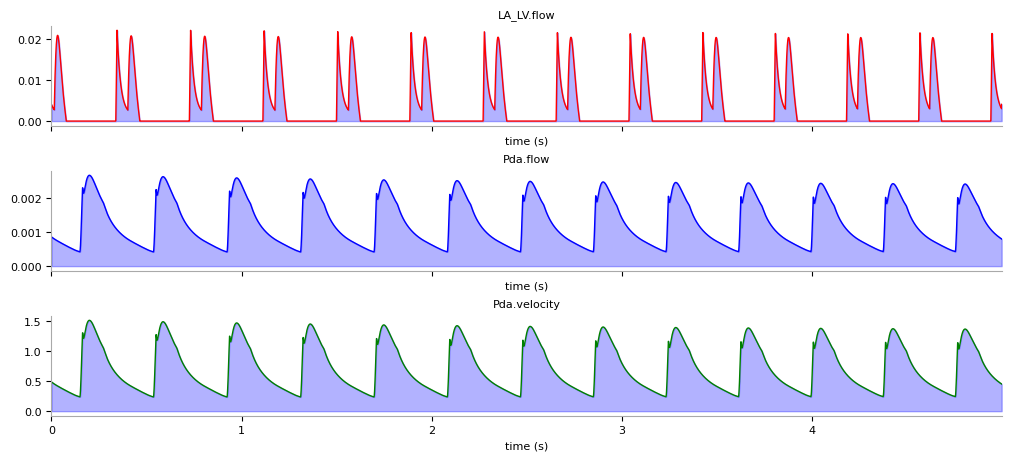

In [2]:
model.models["Breathing"].switch_breathing(False)
neo.fast_forward(1)
print("")
print(
    "Opening the ductus arteriosus by increasing the diameter to 3.0 mm in 10 seconds"
)
neo.open_ductus_arteriosus(new_diameter=3.0, in_time=10.0)

# stabilize the model by calculating 60 seconds and plot the flow velocity across the pda

neo.plot_time_graph(
    ["LA_LV.flow", "Pda.flow", "Pda.velocity", "Pda._current_diameter"],
    combined=False,
    sharey=False,
    time_to_calculate=15.0,
    analyze=False,
    sampleinterval=0.0005,
    fig_size_x=10,
    fig_size_y=2,
    fill=True,
)
model.models["Breathing"].switch_breathing(True)

# stabilize the model by calculating 60 seconds
neo.calculate(60)

# get the vaildation data from the model
result = neo.validate_baseline()

# plot the flow across the mitral valve and pda flow velocity
model.models["Breathing"].switch_breathing(False)
neo.fast_forward(1)
data = neo.plot_time_graph(
    ["LA_LV.flow", "Pda.flow", "Pda.velocity"],
    combined=False,
    sharey=False,
    time_to_calculate=5.0,
    analyze=False,
    sampleinterval=0.0005,
    fig_size_x=10,
    fig_size_y=2,
)
model.models["Breathing"].switch_breathing(True)


 Model validation data for 'normal neonate', weight: 0.826 kg, gestational age: 40.0 wks

 Heartrate      : 154 bpm
 Art pressure   : 48/23 (31) mmHg
 Pulm pressure  : 48/19 (29) mmHg
 LVO            : 247.1 ml/kg/min
 LVEDV          : 2.5 ml/kg
 LVESV          : 0.9 ml/kg
 LVSV           : 1.6 ml/kg
 RVO            : 161.1 ml/kg/min
 RVEDV          : 2.9 ml/kg
 RVESV          : 1.6 ml/kg
 RVSV           : 1.0 ml/kg
 LVO/RVO        : 1.53
 DAo flow       : 86.1 ml/kg/min
 SVC flow       : 67.7 ml/kg/min
 PDA flow net   : 91.8 ml/kg/min, LtR: 98.8 ml/kg/min, RtL: 7.1 ml/kg/min
 FO flow net    : 4.8 ml/kg/min, LtR: 4.8 ml/kg/min, RtL: 0.0 ml/kg/min
 Resp rate      : 36 bpm
 SpO2 pre       : 97 %
 SpO2 post      : 97 %
 SpO2 ven       : 68 %
 pH             : 7.41
 pCO2           : 5.5 kPa
 pO2            : 11.3 kPa
 HCO3           : 25.9 mmol/l
 BE             : 0.9 mmol/l

 Ready in 0.3 sec. Average model step in 0.1610 ms.


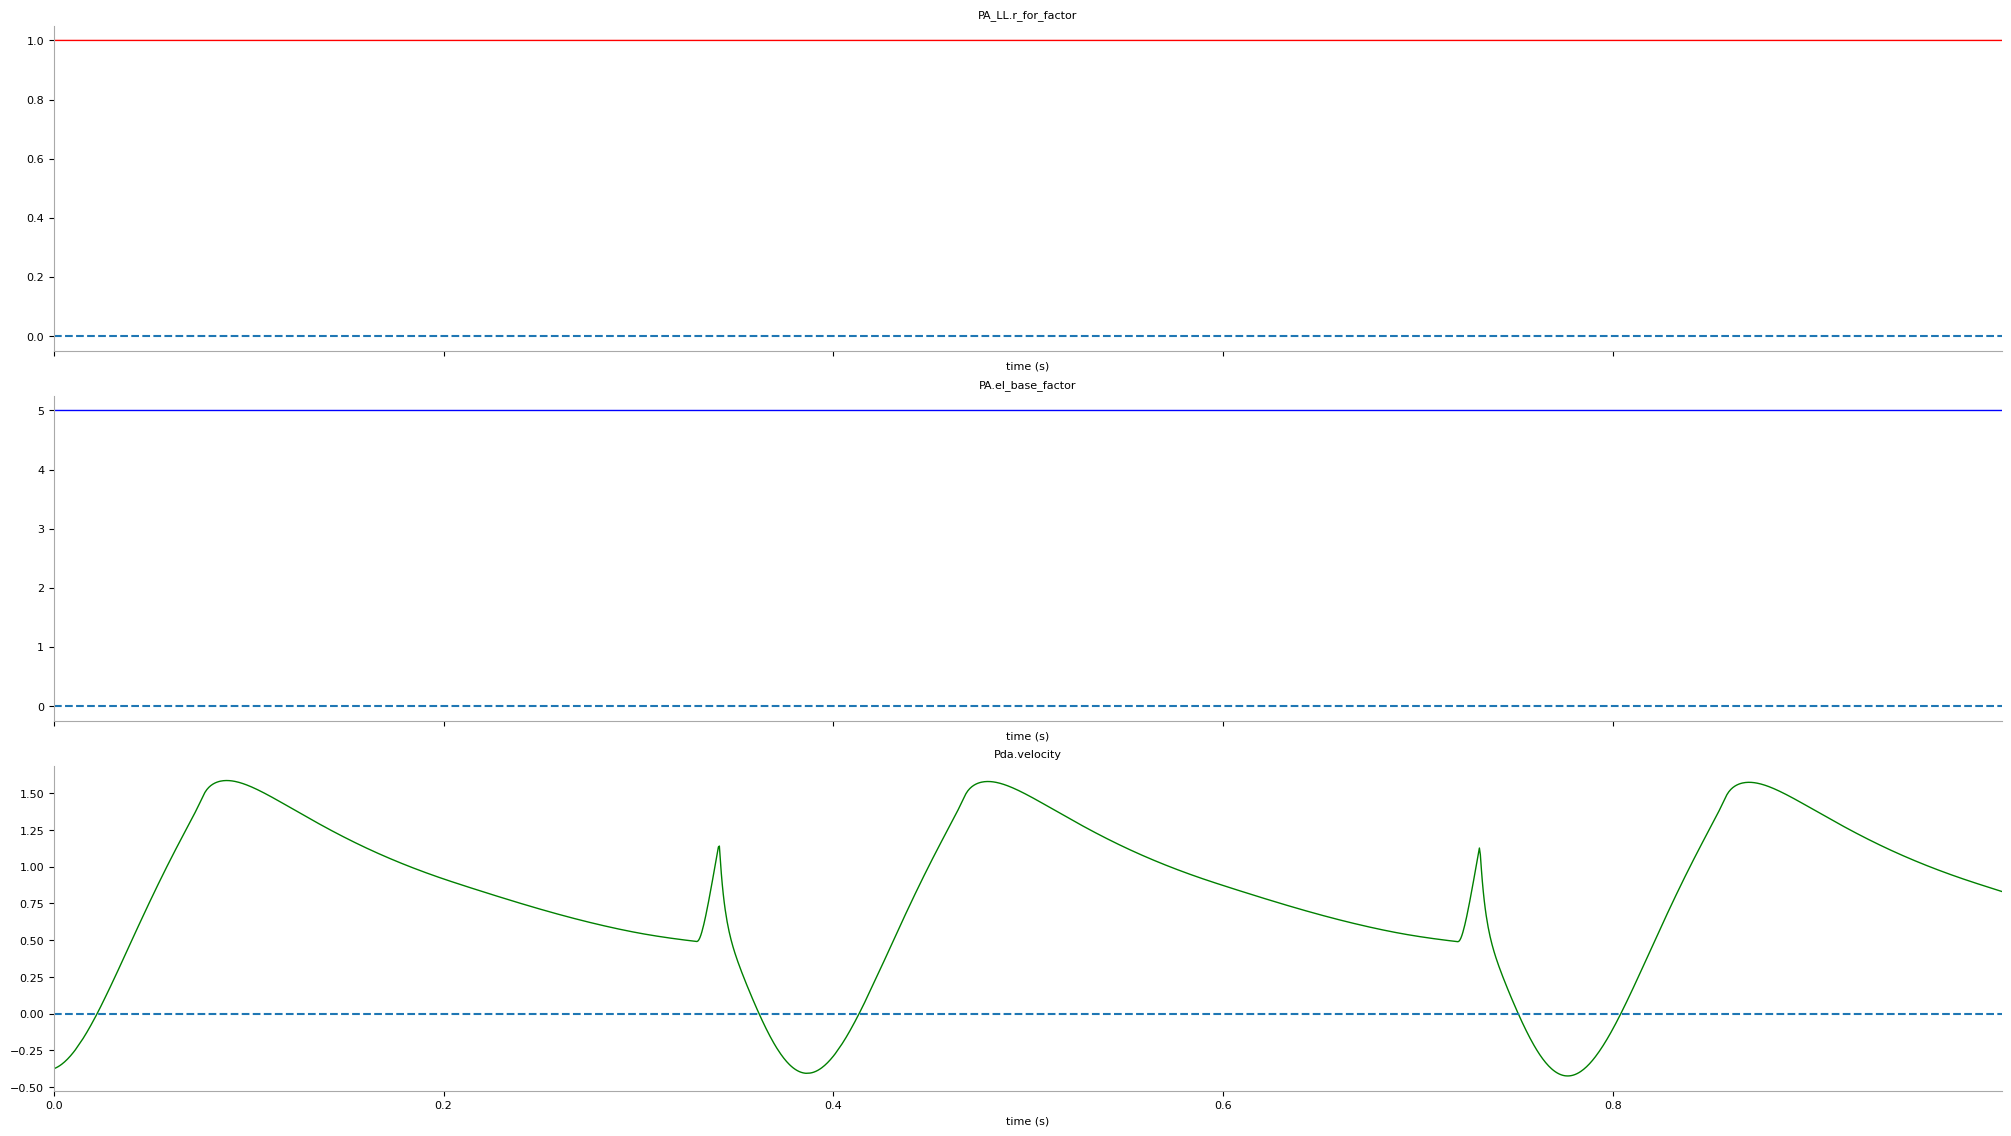

In [21]:
# Bidirectional shunt
# increase the pulmonary vascular resistance
# model.models["Circulation"].set_ofo_diameter(0.85)
neo.open_ductus_arteriosus(new_diameter=3.0, in_time=10.0)
model.models["Circulation"].change_pvr(1.0)
neo.set_model_property(prop="PA.el_base_factor", new_value=5.0, in_time=10.0)


# stabilize the model by calculating 60 seconds
# neo.calculate(60)

# get the vaildation data from the model
result = neo.validate_baseline()


# plot the flow across the mitral valve and pda flow velocity
model.models["Breathing"].switch_breathing(False)
neo.fast_forward(1)
data = neo.plot_time_graph(
    ["PA_LL.r_for_factor", "PA.el_base_factor", "Pda.velocity"],
    combined=False,
    sharey=False,
    time_to_calculate=1.0,
    analyze=False,
    sampleinterval=0.0005,
    fig_size_x=20,
    fig_size_y=5,
    fill=False,
    zeroline=True,
)
model.models["Breathing"].switch_breathing(True)

 Ready in 4.5 sec. Average model step in 0.0374 ms.

 Model validation data for 'normal neonate', weight: 0.826 kg, gestational age: 40.0 wks

 Heartrate      : 156 bpm
 Art pressure   : 43/28 (33) mmHg
 Pulm pressure  : 46/28 (34) mmHg
 LVO            : 137.2 ml/kg/min
 LVEDV          : 1.7 ml/kg
 LVESV          : 0.8 ml/kg
 LVSV           : 0.9 ml/kg
 RVO            : 161.4 ml/kg/min
 RVEDV          : 3.0 ml/kg
 RVESV          : 1.7 ml/kg
 RVSV           : 1.0 ml/kg
 LVO/RVO        : 0.85
 DAo flow       : 92.3 ml/kg/min
 SVC flow       : 71.6 ml/kg/min
 PDA flow net   : -28.3 ml/kg/min, LtR: 1.5 ml/kg/min, RtL: 29.8 ml/kg/min
 FO flow net    : -3.9 ml/kg/min, LtR: 0.0 ml/kg/min, RtL: 3.9 ml/kg/min
 Resp rate      : 40 bpm
 SpO2 pre       : 93 %
 SpO2 post      : 87 %
 SpO2 ven       : 60 %
 pH             : 7.41
 pCO2           : 5.5 kPa
 pO2            : 6.5 kPa
 HCO3           : 25.9 mmol/l
 BE             : 0.8 mmol/l

 Ready in 0.3 sec. Average model step in 0.1572 ms.


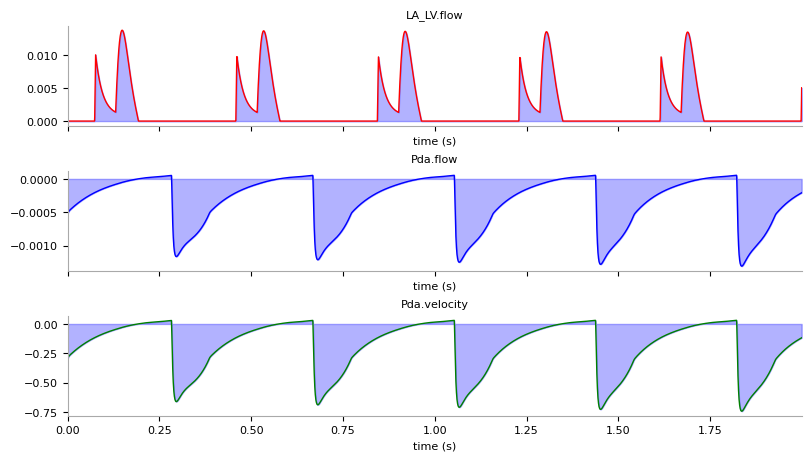

In [42]:
# RtL shunt
# increase the pulmonary vascular resistance
model.models["Circulation"].set_ofo_diameter(0.85)
neo.open_ductus_arteriosus(new_diameter=3.0, in_time=10.0)
model.models["Circulation"].change_pvr(4.2)
model.models["PA"].el_base_factor = 1.2


# stabilize the model by calculating 60 seconds
neo.calculate(60)

# get the vaildation data from the model
result = neo.validate_baseline()


# plot the flow across the mitral valve and pda flow velocity
model.models["Breathing"].switch_breathing(False)
neo.fast_forward(1)
data = neo.plot_time_graph(
    ["LA_LV.flow", "Pda.flow", "Pda.velocity"],
    combined=False,
    sharey=False,
    time_to_calculate=2.0,
    analyze=False,
    sampleinterval=0.0005,
    fig_size_x=8,
    fig_size_y=2,
)
model.models["Breathing"].switch_breathing(True)